In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_Xor(nb_features=400):
  
    """
        Function that creates XOR dataset
        :param nb_features: number of features
        :type nb_features : int
        :return: X  input numpy array shape(2,400)
        :rtype: numpy array
        :return: Y true-false labels numpy array shape(400,1)
        :rtype: numpy array
    
      """
    X = np.random.randint(2, size = (2,nb_features))
    Y = np.logical_xor(X[0,:],X[1,:])
    print(Y)
  
    #reshape Y
  
    Y = Y.reshape(1,400)
                        
    print(f"X.shape = {X.shape}")
    print(f"Y.shape = {Y.shape}")
                        
    return X,Y

In [3]:
 X,Y = create_Xor()


[ True False False False  True  True False False False  True  True  True
 False  True  True False False False False  True False  True False False
  True  True  True  True False  True False False False False  True False
  True False  True  True  True  True  True False False False  True  True
 False False False False False False False False False  True  True False
 False  True  True False False False False False  True  True False False
 False  True  True  True False  True False  True False  True False False
 False  True  True False False  True  True  True  True  True False  True
  True  True False False  True  True  True  True  True  True False False
  True False  True False False  True  True False  True  True  True  True
 False  True False  True False  True False  True  True False  True  True
 False False  True  True False  True False  True False  True  True  True
 False  True False False  True False False False  True False  True False
 False False  True False False False  True False Fa

In [4]:
def sigmoid(Z):
  """
      Function that implement sigmoid
      :param Z: input value
      :type Z: float, array
      :return s: sigmoid result of Z 
      :rtype s:  float or array
  """
  
  s = 1/(1+(np.exp(-Z)))
  # sigmoid(0) == 0.5
  
  assert(0.5 == 1/(1+(np.exp(0))))
  
  return s

In [5]:
#test sigmoid

sigmoid(2)

0.8807970779778823

In [6]:
#sigmoid d'un array
sigmoid_array= sigmoid(np.array([0,2]))
sigmoid_array

array([0.5       , 0.88079708])

In [11]:
def relu(Z):
    """
          Function that implement relu
          :param Z: input value
          :type Z: float, array
          :return: relu result of Z 
          :rtype: float or array
      """
  
 #   Z>0 c'est un test si Z>0 alors on va avoir 1 sinon on va avoir 0

    r = Z * (Z>0)
    
    #r = np.maximum(0,Z)
   
    assert(0.5 == 0.5 * (0.5>0))
    assert(0   == -1  * (-1>0))
  
  
    return r

In [12]:
def derivative_sigmoid(dA,activation_cache):
    """
      Function that implement the derivative of sigmoid
      :param Z: input value
      :type Z: float, array
      :return: derivative result of Z 
      :rtype: float or array
    """
    Z = activation_cache
#     print("Z.shape = ", Z.shape, "dA.shape = ", dA.shape)
    s = 1/(1+np.exp(-Z))
    dZ= dA * s *(1-s)
#     print("dZ.shape = ", dZ.shape, "s.shape = ", s.shape)
    assert(0.25 == sigmoid (0) * (1-sigmoid(0)))
  
    return dZ

In [41]:
# dZ = derivative_sigmoid(45)
# dZ

In [42]:
# def derivative_relu(dA,activation_cache):
#   """
#       Function that implement the derivative of relu
#       :param Z: input value
#       :type Z: float, array
#       :return: derivative result of Z 
#       :rtype: float or array
      
#   """
  
#   dZ= 1 * (Z>0)
  
#   assert (0 == 1 * (-1>0) )
#   assert (1 == 1 * (1>0) )
  
#   return dZ

In [13]:
def derivative_relu(dA, activation_cache):
    
    Z = activation_cache
    dZ = np.array(dA,copy = True)
    dZ[Z<= 0] = 0
    assert (dZ.shape == Z.shape)
    
    return dZ

In [44]:
#dZ= derivative_relu(0)

In [14]:
def initialisation_deep(dim_layers):
  
    """ 
      Function that initialize weights and biais for each layer
      :param dim_layers: list of each layer
      :type dim_layers: pyhon list
      :return parameters dictionnary with W1,b1,......WL,bL
      :rtype: python dictionnary
      Wl --- weight matrix of shape (dim_layers[l],dim_layers[1-l])
      b1 --- weight matrix of shape (dim_layer[l],dim_layers[1-l])
    """
    np.random.seed(3)
    parameters={}
    
    L = len(dim_layers)
    
    for l in range(1,L):
   
        parameters[f'W{l}']= np.random.randn(dim_layers[l], dim_layers[l-1])*0.01

        parameters[f'b{l}'] = np.zeros((dim_layers[l],1))
    
#     print(f'W{l}.shape = {dim_layers[l]},{dim_layers[l-1]}')
#     print(f"b{l}.shape = {dim_layers[l]}, 1 ")

    assert (parameters[f"W{l}"].shape == (dim_layers[l],dim_layers[l-1]))
    assert (parameters[f"b{l}"].shape == (dim_layers[l],1))
    
    return parameters




In [15]:
dim_layers= [2,3,4,5,1]
parameters = initialisation_deep(dim_layers)

parameters

{'W1': array([[ 0.01788628,  0.0043651 ],
        [ 0.00096497, -0.01863493],
        [-0.00277388, -0.00354759]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'W2': array([[-0.00082741, -0.00627001, -0.00043818]]), 'b2': array([[0.]])}

In [16]:
def linear_activation_forward (A_prev ,W , b, activation):
    """
      function that both computes preactivation and activation 
      :param A_prev: previews activation matrix (for the first layer it is X )
      :param W: weight matrix for the current layer
      :param b: biais matrix for the current layer
      :param activation: choice of activation function eg: sigmoid , relu
      :type A_prev : matrix of float
      :type W: matrix of float
      :type b: matrix of float
      :return: A matrix of activation
      :cache: tuple of (linear_cache,activation_cache) 
      """

    Z = np.dot(W,A_prev)+b

    linear_cache = (A_prev,W,b)
  
  
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
  
    if activation == "sigmoid":
         
        A = sigmoid(Z)
        activation_cache = A
    
    elif activation == "relu":
         
        A = relu(Z)
        activation_cache = A
         
         
    assert (A.shape == Z.shape)
         
    cache = (linear_cache, activation_cache)
  
    return A,cache


In [48]:
#A,cache = linear_activation_forward(X,parameters['W1'],parameters['b1'],"relu")
# print(A)

In [49]:
# # A_test= np.array([
# #            [3,4,5],
# #            [3,4,7],
#            [4,2,1]
#                   ])
# # W_test= np.array([
#                 [5,3,1],
#                 [6,7,9],
#                 [3,5,2]
#                        ])
# # b_test= ([
#           [0],
#           [0],
#           [0]
#              ])
# # A,cache = linear_activation_forward(A_test,W_test,b_test,"relu")


In [17]:
# faire une fonction forward sur l layers
def forward_layers(X,parameters):
    """
       Function that computes the forward activation for L layers
      :param X: input matrix, shape (input_size, number of exemple)
      :param parameters: output of initialisation_deep dictionnary of W, b
      :type X: matrix of float
      :type parameters : dictionary of matrices
      :return AL : last post activation value
      :return caches : list of caches with every caches of linear_activation_forward 
      :rtype AL: matrix of float
      :rtype caches: list of tuples

  """
    #je crée une  liste de  caches où je vais stoker les valeurs obtenues
    caches = []
    A = X
    L = len(parameters) // 2 # je calcul le nombre de couches par rapport aux nombres de paramètres
    #je fais une boucle pour toutes les couches jusqu'à L-1
    for l in range (1,L): 
    #je considère X comme 
        A_prev= A
#       je fais mon calcul pour A0 jusqu'à L-1 ou bien (1 à L)
        A,cache = linear_activation_forward(A_prev,parameters[f'W{l}'],parameters[f'b{l}'],"sigmoid")
       
        #je rajoute le cache obtenu dans la liste cache
        caches.append(cache)
      
      #calcul pour la dernière couche:
      #je récupère le dernier A qui est sorti de mes couches précédentes et je lui mets une sigmoid 
      
    AL,cache = linear_activation_forward(A,parameters[f'W{l+1}'],parameters[f'b{l+1}'],"sigmoid")
    caches.append(cache)
   
    assert AL.shape == (1,X.shape[1])
    
    return AL,caches

 
  
  
      
      

In [51]:
# AL,caches = forward_layers(X,parameters)
# AL

In [52]:
# #test sur les petits array

# parameters_test={"W1":W_test,
#                  "b1":b_test}

# ALtest,caches_test = forward_layers(A_test,parameters_test)

In [18]:
m = X.shape[1]

def compute_cost(AL,Y):
    """
        Function that compute the cost 
        :param AL: probability vector - shape (1,number of examples)
        :param Y:  matrix of float
        :type AL: matrix
        :type Y: array of booleen
        :return cost: cost result
        :rtype: float 
    """
    #je calcule d'abord llog
    logprob = (Y * np.log(AL) + (1-Y) * np.log(1-AL))
    #ensuite la cost
    cost = -(np.sum(logprob))/m
    #je veux que l'on me retourne un nombre et non pas un array
    cost = np.squeeze(cost)
    #être sur que j'ai la cost au bon format
    assert(isinstance(cost,float))
  
    return cost

In [54]:
# cost_test = compute_cost(Y,Y)
# print(cost_test)

In [19]:
#backward L layer
def linear_backward(dZ,cache):
    """
        function that computes the linear backward
        :param dZ: gradient of the cost with respect to linear output
        :param cache: tuple of value
        :return dA_prev: gradient of the cost with respect to activation
        :return dW: gradient of the cost with respect to W
        :return db: gradient of the cost with respect to b
    """
    #recuperation des valeurs dont j'ai besoin
    
    A_prev, W, b = cache
    m=A_prev.shape[1]
    #calcul des dérivées:
  
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims = True)/m
    dA_prev= np.dot(W.T,dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
  
    return dA_prev,dW,db

In [25]:
# fonction backward pour l'implémentation de la backward si fonction d'activation est une sigmoid ou fonction d'activation est une RELU

def linear_activation_backward(dA,cache,activation):
    """  
        function that computes the linear activation backward with sigmoid and relu
        :param dA: gradient of the activation for the current layer the l layer
        :param cache: tuple of values with the parameters
        :param activation: activation function-Relu or Sigmoid
        :type dA: numpy array
        :type activation: string
        :return dA_prev: gradient activation of the l-1 layer-shape = A_prev shape
        :return dW: gradient of the cost with respect of the W for the current layer l
        :return db: gradient of the cost with respect of the b for the current layer l
    """
    #je récupère de mon cache les paramètres 

    linear_cache, activation_cache = cache
    
    # je calcule dZ en fonction de l'activation RELU ou Sigmoid
    if activation == 'relu':
        dZ = derivative_relu(dA, activation_cache)
        dA_prev,dW,db = linear_backward (dZ,linear_cache)
        
    elif activation == 'sigmoid':
        dZ = derivative_sigmoid(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db
    

In [26]:
def l_model_backward(AL,Y,caches):
    
    """ 
          function that compute the backward propagation
          :param AL: array with the last activation -probability vector 
          :param Y: array with the label
          :param caches: list of caches of all the parameters of relu activation and one cache with all the parameters with sigmoid
          :type AL: numpy array
          :type Y: vectord
          :type caches: python list
          :return grads: dictionnary of gradients dW,db,dA
          
    """
    grads = {}
#     print("initialisation de grad")
    L = len(caches) #nombre de couches (correspond aux nombres de caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) #on reshape Y comme AL pour pouvoir faire les opérations
#     print("L = ", L, " m = ",m, " Y = ",Y)
    #     initialisation de la back propagation pour calculer dAL
   
    
    dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))
#     print("dAL=", dAL)
    
  
      #calcul des gradients pour la dernière couche L sigmoid 
    #j'utilise le cache de la dernière couche et je mets tout dans un dictionnaire

    current_cache = caches[L-1]
#     print("current_cache = ", current_cache)
    grads[f"dA{L-1}"], grads[f"dW{L}"], grads[f"db{L}"] = linear_activation_backward(dAL,current_cache, activation ="sigmoid")
#     print([f"dA{L-1}"], grads[f"dW{L}"], grads[f"db{L}"])
  
    #ensuite je fais une boucle pour les autres couches de l= l-2 à l = 0
  
    for l in reversed(range(L-1)):
        """ 
#             entrée : la dérivée dA l+1 et le cache de la couche current
#             sortie : la dérivée dA l et dWl+1 et dbl+1
        
#         """
        
        current_cache = caches[l]
        
#         print("l = ", l , "current_cache W =", current_cache[0][1].shape)
#         #je crée des variables temporaires: dA_prev_temp, dW_temp, db_temp
    
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward (grads[f"dA{l+1}"], current_cache, activation = "sigmoid")
    
# #         #je les mets dans le dictionnaire
    
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l+1}"] = dW_temp
        grads[f"db{l+1}"] = db_temp

#         print ("da", l, grads[f"dA{l}"].shape)

        
    return grads
          

In [27]:
def update_parameters(parameters,grads,learning_rate):
    """
        function that update parameters using the gradient descent
        :argument parameters: python dictionary with parameters
        :argument grads: python dictionnary with all the gradient
        :return parameters: python dictionnar with the updated parameters
    """
    L = len (parameters)//2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [47]:
#fonction globale qui compute tout (on commence pour faire la forward)

def L_layer_model(X,Y, dim_layers, learning_rate = 0.0075,num_iterations = 3000, print_cost = False):
    
    """
        :param X: matrix of inputs
        :param Y: vector of label
        :param layers_dims: list that contains the input size and each layer size
        :param learningrate: learning rate for the gradient descent
        :param num_iterations: number of iterations of the loop
        :param print_cost: decide if it print the cost (True)or not (False) 
        :type X: numpy matrix
        :type Y: numpy array
        :type layers_dims: python list
        :type learningrate float
        :type num_iteration: int
        :type printcost : bool
        :return 
    """
    np.random.seed(1)
    costs = []
    
    #initialisation des paramètres
    
    parameters = initialisation_deep(dim_layers)
    
    #boucle de 0 à nombre d'iterations:
    
    for i in range (0,num_iterations):
        
        #forward propagation l layers
        AL,caches = forward_layers(X,parameters)
        
        #compute cost
        cost = compute_cost(AL,Y)
#         print(cost)
        
        #L model backward
        grads = l_model_backward(AL,Y,caches)
        
        #update parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
    # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print(cost)
#             print (f"Cost after iteration {i}{cost}")
        if print_cost and i % 1000 == 0:
            costs.append(cost)
                
#     plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(f"Learning rate ={learning_rate}")
    plt.show()

    return parameters
        
        
        
        
        
    
    
    
    

    



0.6932149186602016
0.6924248476822709
0.6917598506337087
0.6918203874158085
0.6923208323324785
0.6920008996401111
0.6916178550844596
0.6930156745712877
0.6014595866145068
0.21660590186208345


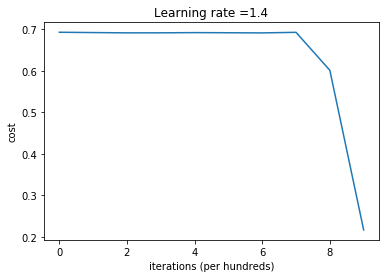

In [51]:
parameters = L_layer_model(X,Y,dim_layers,learning_rate = 1.4 ,num_iterations = 10000, print_cost = True)